In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [46]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


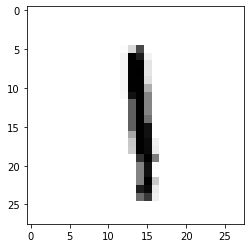

In [95]:
# Let's look at a one image
IMG_INDEX = 8  # change this to look at other images
plt.imshow(train_images[IMG_INDEX] ,cmap='Greys')
plt.show()

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])


In [26]:
model.summary()  # let's have a look at our model so far

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [28]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
 flatten_6 (Flatten)         (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 103,124
Trainable params: 103,124
Non-tr

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2702 - accuracy: 0.9189 - val_loss: 0.1554 - val_accuracy: 0.9516
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1121 - accuracy: 0.9658 - val_loss: 0.1121 - val_accuracy: 0.9666
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0804 - accuracy: 0.9751 - val_loss: 0.0917 - val_accuracy: 0.9704
Epoch 4/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0619 - accuracy: 0.9813 - val_loss: 0.0996 - val_accuracy: 0.9702


In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0996 - accuracy: 0.9702 - 701ms/epoch - 2ms/step
0.9702000021934509


2


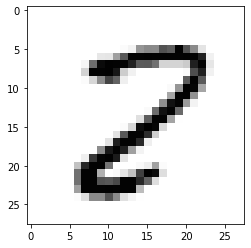

In [52]:
IMG_INDEX = 444
plt.imshow(test_images[IMG_INDEX].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[IMG_INDEX].reshape(1, 28, 28, 1))
print(pred.argmax())

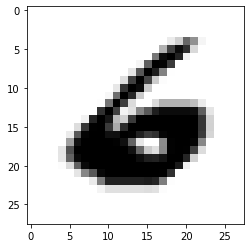

6


In [94]:
#loading and predicting my own written number
import cv2 as cv
file = "/content/Screenshot_3.png"
image = cv.imread(file, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28,28))
image = 255-image          #inverts image. Always gets read inverted.

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

print(pred.argmax())